## 스파크 데이터 시각화
+ 스파크 데이터프레임을 판다스 객체로 변환해야만 시각화 가능
+ 파이썬의 데이터 시각화 패키지는 matplotlib 또는 seaborn

In [7]:
import pandas as pd

In [9]:
import seaborn as sns

In [8]:
titanic = spark.read.csv('titanic.csv', header=True, inferSchema=True)

In [10]:
titanic.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- embarked: string (nullable = true)
 |-- life: string (nullable = true)
 |-- seat: string (nullable = true)
 |-- port: string (nullable = true)



In [15]:
titanic.summary().show()

+-------+------------------+-------------------+--------------------+------+------------------+------------------+-------------------+-----------------+-----------------+--------+----+----+------------+
|summary|            pclass|           survived|                name|   sex|               age|             sibsp|              parch|           ticket|             fare|embarked|life|seat|        port|
+-------+------------------+-------------------+--------------------+------+------------------+------------------+-------------------+-----------------+-----------------+--------+----+----+------------+
|  count|              1306|               1306|                1306|  1306|              1306|              1306|               1306|             1306|             1306|    1306|1306|1306|        1306|
|   mean| 2.296324655436447|0.38131699846860645|                null|  null| 29.82687984438616|               0.5|0.38591117917304746|249580.3029350105|33.22395627871377|    null|null|null

### spark 객체를 pandas 객체 변환 : to_panda

In [12]:
titanic2 = titanic.toPandas()

In [13]:
titanic2.describe()

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.826880,0.50000,0.385911,33.223956
std,0.837037,0.485896,12.837289,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.00000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


#### 타이타닉 승객 생존자/사망자 현황

#### 범주형 : seaborn의 countplot으로 시각화

#### countplot(변수, 데이터객체)

<AxesSubplot:xlabel='survived', ylabel='count'>

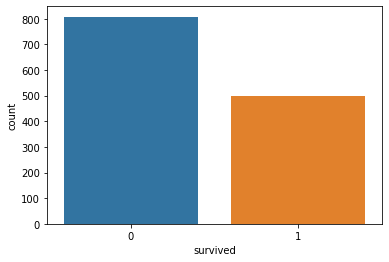

In [16]:
sns.countplot(data=titanic2, x='survived')

<AxesSubplot:xlabel='life', ylabel='count'>

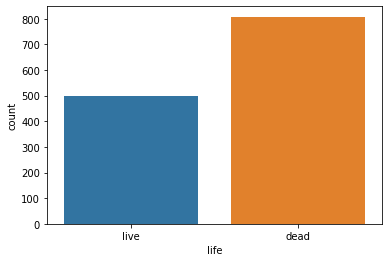

In [17]:
sns.countplot(data=titanic2, x='life')

#### 타이타닉 승객 승선위치별 현황

<AxesSubplot:xlabel='seat', ylabel='count'>

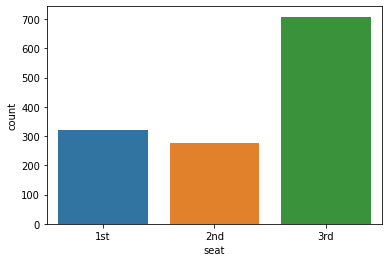

In [18]:
sns.countplot(data=titanic2, x = 'seat')

#### 타이타닉 승객 성별현황

<AxesSubplot:xlabel='sex', ylabel='count'>

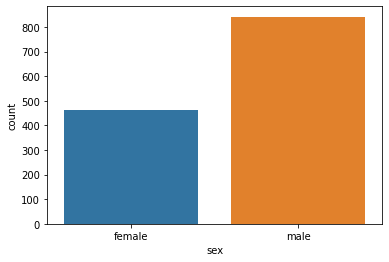

In [19]:
sns.countplot(data=titanic2, x = 'sex')

#### 타이타닉 승객 입항 항구

<AxesSubplot:xlabel='port', ylabel='count'>

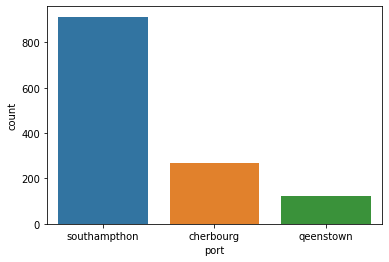

In [20]:
sns.countplot(data=titanic2, x = 'port')

#### 사원들의 직책별 현황

In [23]:
employees = spark.read.csv('employees.csv', header=True, inferSchema=True)

In [24]:
employees.printSchema()

root
 |-- EMPLOYEE_ID: integer (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- EMAIL: string (nullable = true)
 |-- PHONE_NUMBER: string (nullable = true)
 |-- HIRE_DATE: timestamp (nullable = true)
 |-- JOB_ID: string (nullable = true)
 |-- SALARY: integer (nullable = true)
 |-- COMMISSION_PCT: double (nullable = true)
 |-- MANAGER_ID: integer (nullable = true)
 |-- DEPARTMENT_ID: integer (nullable = true)



In [25]:
emp = employees.toPandas()

<AxesSubplot:xlabel='JOB_ID', ylabel='count'>

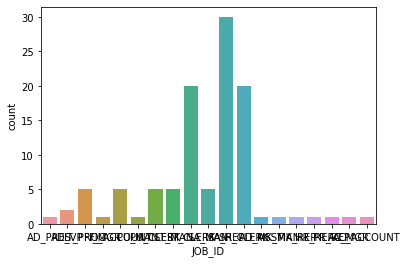

In [26]:
sns.countplot(data=emp, x='JOB_ID')